# <font color='blue'>Face Mask Detection using MobileNet-V2</font>
#### The Dataset used here can be found through  <a href="https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset" target="_blank">`This Link`</a> on Kaggle Website. 

#### All work here is done on **CoLab** 

## Unzip The compressed train file

In [5]:
!unzip face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [6]:
!rm face-mask-12k-images-dataset.zip

## Import Libraries required to show random images 

In [2]:
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from IPython.display import Image
import matplotlib.pyplot as plt 

from google.colab import files

from tensorflow.keras.preprocessing.image import load_img
from sklearn.utils import shuffle
from matplotlib import rcParams

from os import listdir
from PIL import Image as PImage
import os
import shutil, sys
import pandas as pd
import random
%matplotlib inline
from matplotlib import pyplot as plt



### Define a function to load and display images

In [4]:
def showImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImgs = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImgs.append(img)
             
    for im in loadedImgs:
        im.show()

    plt.figure(figsize=(20,10))
    columns = 5
    for i, image in enumerate(random.sample(loadedImgs, 10)):
        plt.subplot(len(random.sample(loadedImgs, 10)) / columns + 1, columns, i + 1)
        plt.imshow(image) 
    return 
  


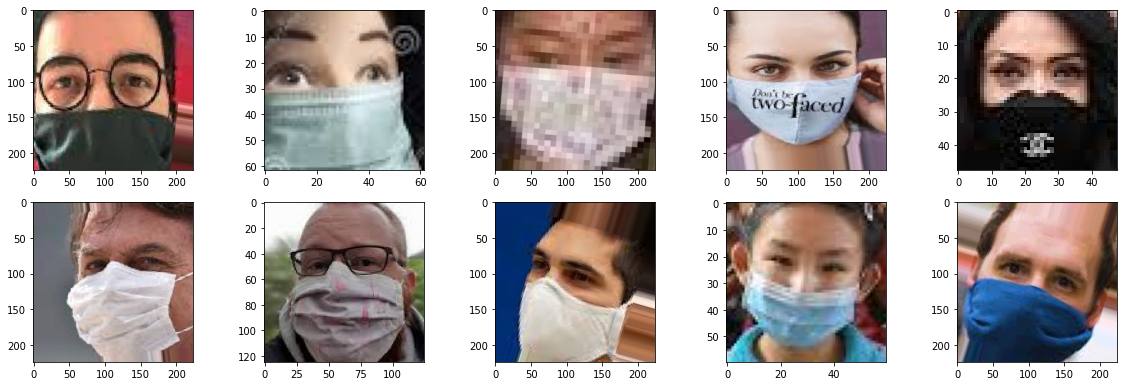

In [5]:
path = "/content/Face Mask Dataset/Train/WithMask/"
showImages(path)

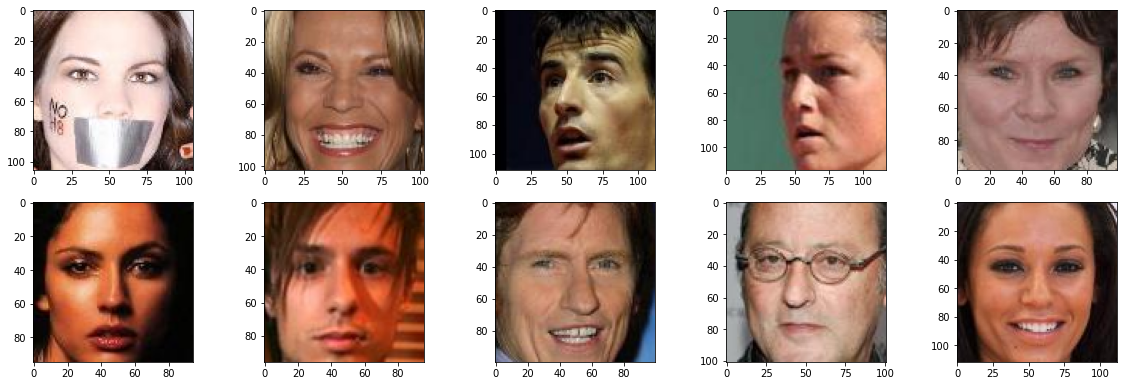

In [6]:
path = "/content/Face Mask Dataset/Train/WithoutMask/"
showImages(path)

## Import the libraries required for creating folders and move files of Test Data

In [8]:
len(os.listdir('/content/Face Mask Dataset/Test'))

2

In [9]:
len(os.listdir('/content/Face Mask Dataset/Test/WithMask'))

483

In [10]:

len(os.listdir('/content/Face Mask Dataset/Test/WithoutMask'))

509

In [11]:
def loadImages(list_path):
    # return list of images

    # Based URL
    URL = "/content/Face Mask Dataset/"

    loadedImages=[]

    # Read each Image and get to the list
    for path in list_path:
        print("[INFO] loading "+path+" dataset . . . ")
        imagesList = listdir(URL+path)
        temp = []
        for image in imagesList:
            img = load_img(URL+path +"/"+ image, target_size=(224, 224))
            temp.append(img)
        loadedImages+=temp

    return loadedImages

In [12]:
loadImages(['Test/WithoutMask','Test/WithMask'])

[INFO] loading Test/WithoutMask dataset . . . 
[INFO] loading Test/WithMask dataset . . . 


[<PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0D1D0450>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED23ED0>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED23F50>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED23F10>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED16210>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED16350>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED16310>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED163D0>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED16450>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED16490>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED16550>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED16590>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED16610>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED16690>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F1F0ED16710>,
 <PIL.Imag

## Model Prediction

### Prediction Function

In [13]:
# Load model
model = load_model('/content/model.06-0.01.h5')

In [14]:
def predict_class(img_name, model):
    """
    Function to predict new image
    """
    test_image = image.img_to_array(img_name)
    test_image = np.expand_dims(test_image, axis=0)
    test_image /= 255.
    prediction= np.argmax(model.predict(test_image), axis=-1)
    plt.figure(figsize=(3,3))
    plt.imshow(img_name)
    
    if prediction[0] ==1:
        print('WithoutMask')
    else:
        print('WithMask')
    return plt.show()

### Loading test data (`WithMask` and `WithoutMask`) into one `DataFrame`

In [15]:
# Define URL for data test
df_test = loadImages(["Test/WithMask","Test/WithoutMask"])
df_test = shuffle(df_test, random_state=0)

[INFO] loading Test/WithMask dataset . . . 
[INFO] loading Test/WithoutMask dataset . . . 


### Show examples of testing data

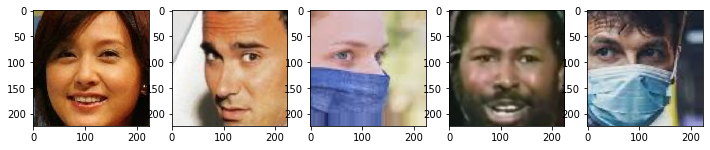

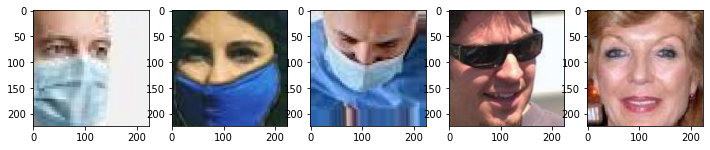

In [16]:
# Show the example of image in data train
%matplotlib inline

shuffle(df_test)

n_image=5

# figure size in inches optional
rcParams['figure.figsize'] = 12 ,12

# display images
fig, ax = plt.subplots(1,n_image)

for i in range(n_image):
    ax[i].imshow(df_test[i]);

# display images
fig, ax = plt.subplots(1,n_image)

for i in range(n_image):
    ax[i].imshow(df_test[i+5]);

### Call Predict Function
##### `Try predict with testing data`

WithoutMask


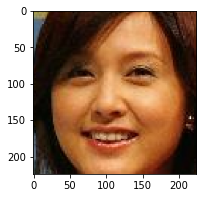

WithoutMask


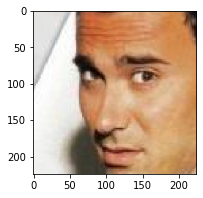

WithMask


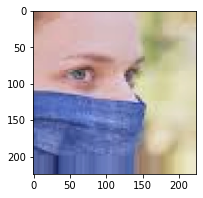

WithoutMask


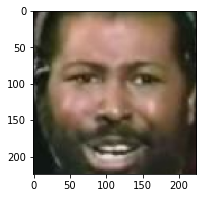

WithMask


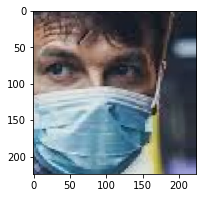

WithMask


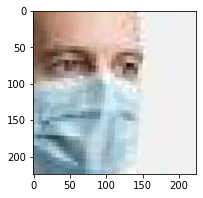

WithMask


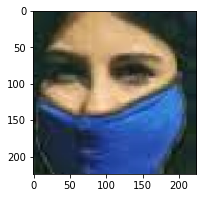

WithMask


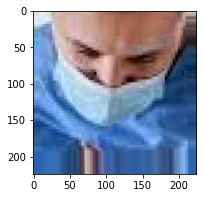

WithMask


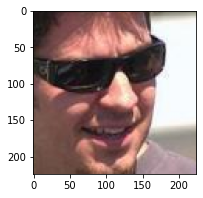

WithoutMask


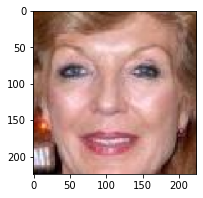

WithoutMask


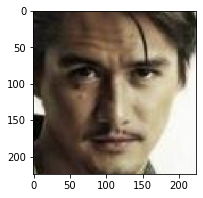

WithMask


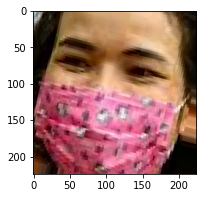

WithMask


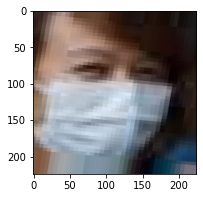

WithMask


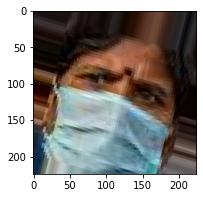

WithoutMask


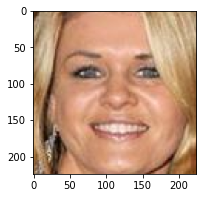

WithoutMask


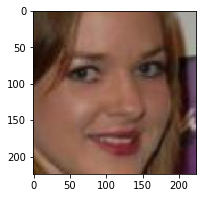

WithoutMask


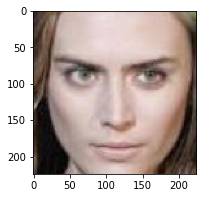

WithoutMask


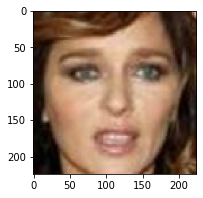

WithoutMask


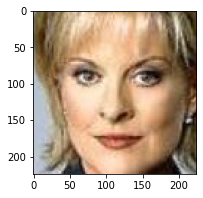

WithMask


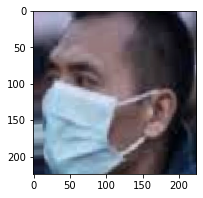

WithMask


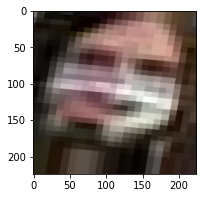

WithMask


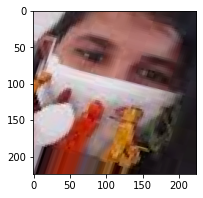

WithMask


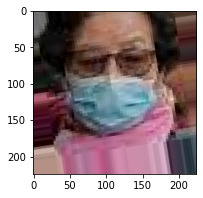

WithMask


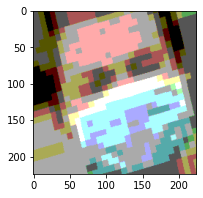

WithMask


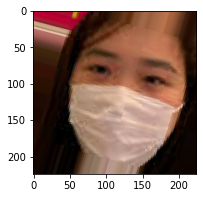

WithoutMask


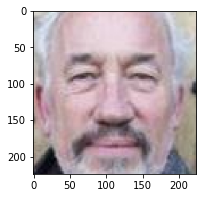

WithMask


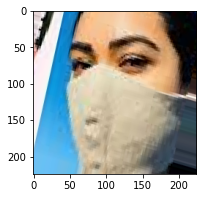

WithMask


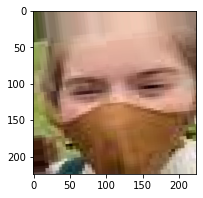

WithoutMask


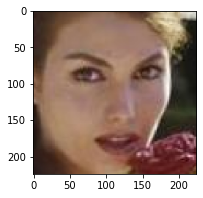

WithoutMask


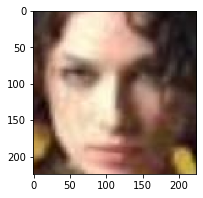

WithoutMask


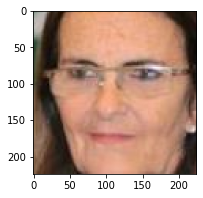

WithMask


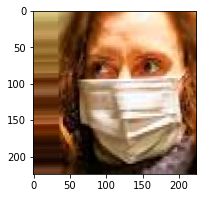

WithMask


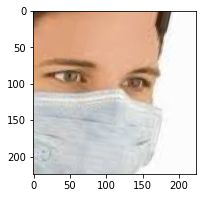

WithMask


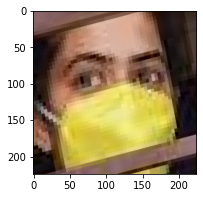

WithoutMask


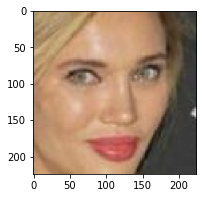

WithMask


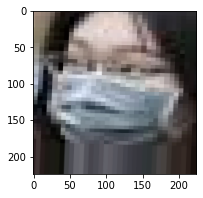

WithoutMask


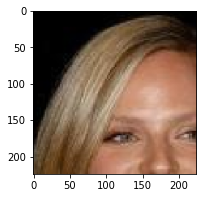

WithoutMask


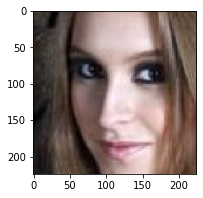

WithoutMask


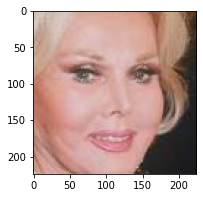

WithoutMask


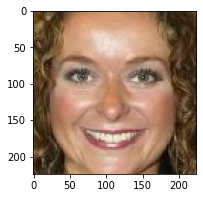

WithoutMask


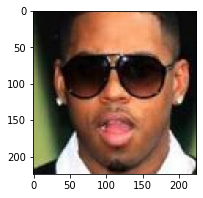

WithoutMask


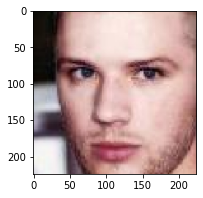

WithMask


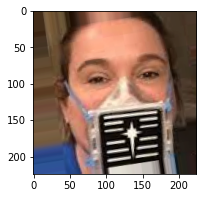

WithMask


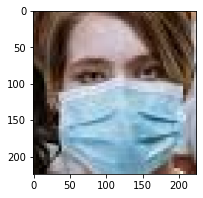

WithMask


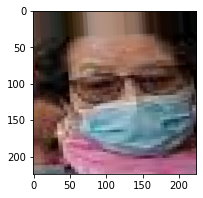

WithoutMask


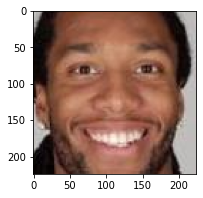

WithoutMask


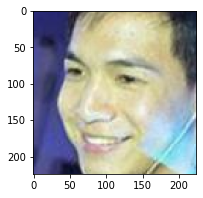

WithoutMask


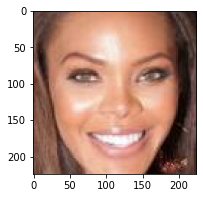

WithoutMask


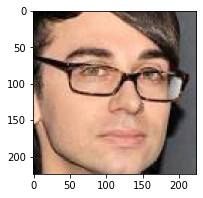

WithMask


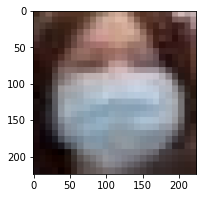

WithoutMask


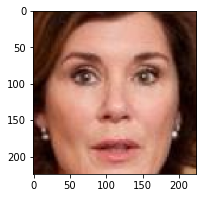

WithoutMask


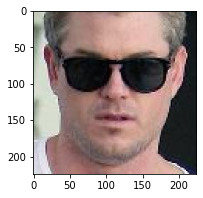

WithMask


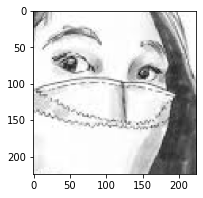

WithoutMask


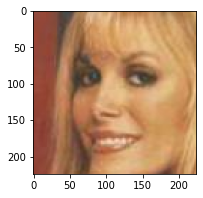

WithoutMask


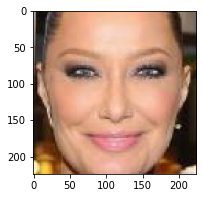

WithMask


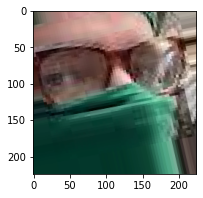

WithoutMask


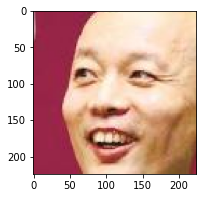

WithoutMask


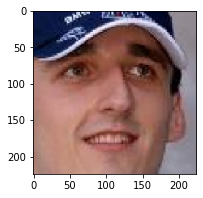

WithMask


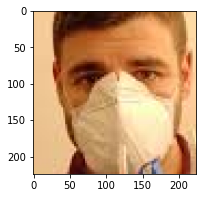

WithoutMask


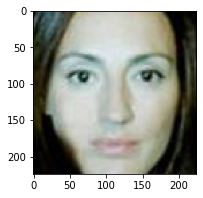

WithoutMask


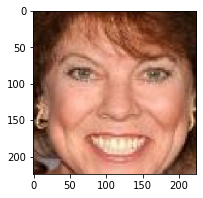

WithMask


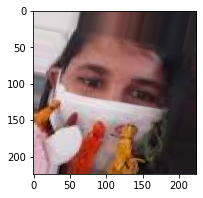

WithoutMask


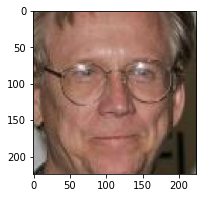

WithMask


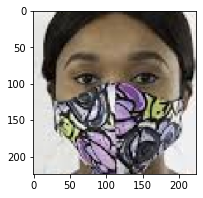

WithoutMask


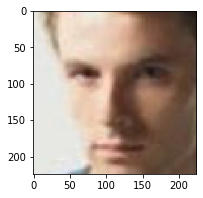

WithMask


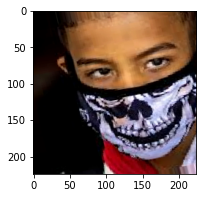

WithMask


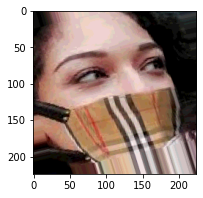

WithMask


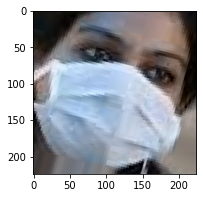

WithoutMask


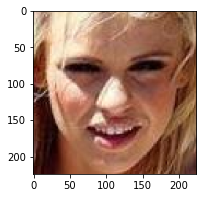

WithMask


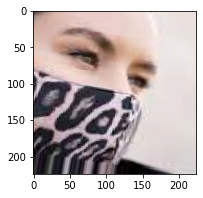

WithoutMask


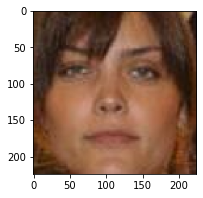

WithoutMask


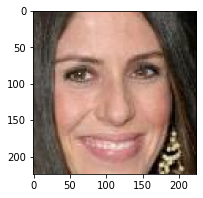

WithoutMask


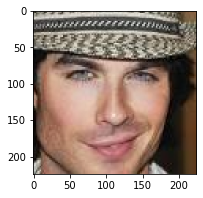

WithMask


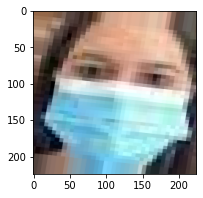

WithoutMask


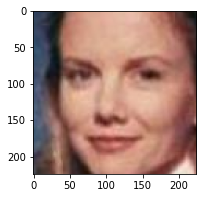

WithoutMask


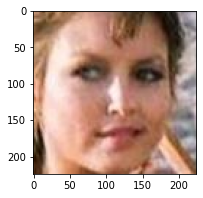

WithoutMask


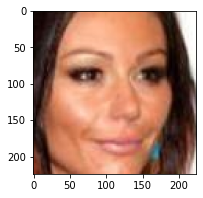

WithoutMask


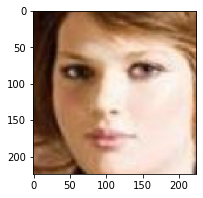

WithoutMask


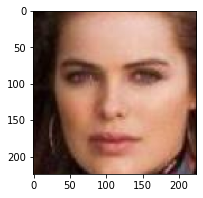

WithMask


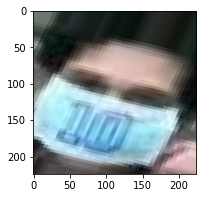

WithMask


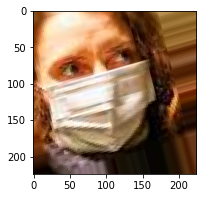

WithoutMask


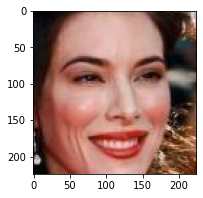

WithMask


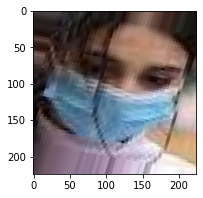

WithMask


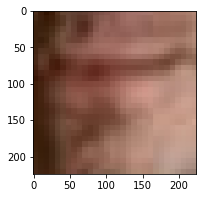

WithoutMask


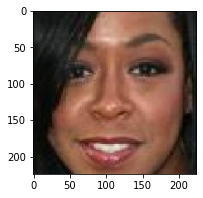

WithoutMask


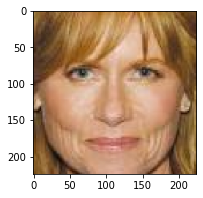

WithoutMask


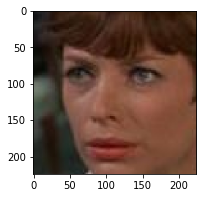

WithMask


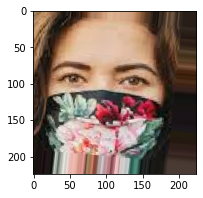

WithoutMask


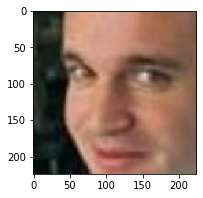

WithMask


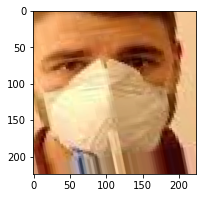

WithoutMask


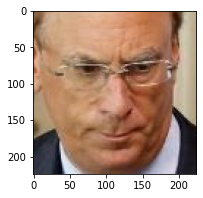

WithMask


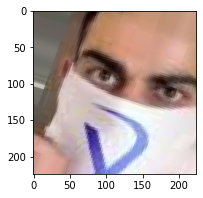

WithoutMask


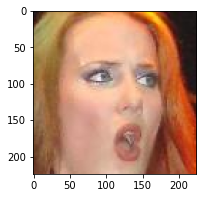

WithMask


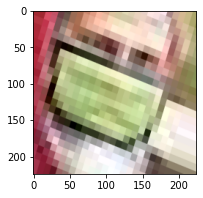

WithoutMask


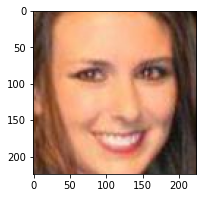

WithoutMask


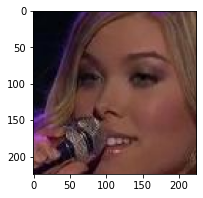

WithoutMask


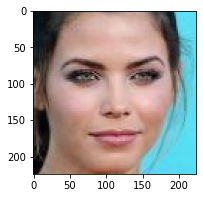

WithMask


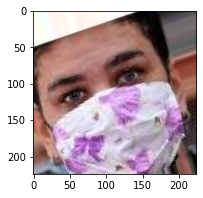

WithMask


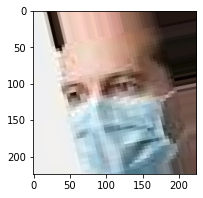

WithMask


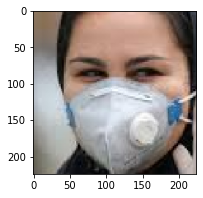

In [18]:
# Classify
for i in range (100):
    predict_class(df_test[i], model)